In [1]:
#Algunas bibliotecas deben importarse antes de que pueda comenzar. 
import pandas as pd
import numpy as np

In [2]:
#El siguiente paso es descargar el archivo de datos del repositorio abierto producido por Our World in Data bajo la licencia Creative Commons BY por read_csv() 
covid_word = pd.read_csv('data/owid-covid-data.csv')
covid_word

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161157,ZWE,Africa,Zimbabwe,2022-02-07,230402.0,0.0,105.143,5362.0,0.0,3.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
161158,ZWE,Africa,Zimbabwe,2022-02-08,230603.0,201.0,107.429,5366.0,4.0,2.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
161159,ZWE,Africa,Zimbabwe,2022-02-09,230740.0,137.0,104.000,5367.0,1.0,2.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
161160,ZWE,Africa,Zimbabwe,2022-02-10,231040.0,300.0,124.286,5373.0,6.0,2.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [3]:
#Estudiemos el DataSet. Como puede ver, el conjunto de datos consta de 86202 filas × 59 columnas. Las primeras 3 columnas 
#contienen información geográfica. Columna 4 - fecha de medición. Otros 55 - Datos de COVID-19. También se observan algunos
#datos faltantes en el DataSet. Debemos asegurarnos de que Python reconozca los tipos de datos correctamente. Para hacer esto, 
#debemos usar pandas.info(). 
covid_word.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161162 entries, 0 to 161161
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    161162 non-null  object 
 1   continent                                   151492 non-null  object 
 2   location                                    161162 non-null  object 
 3   date                                        161162 non-null  object 
 4   total_cases                                 158274 non-null  float64
 5   new_cases                                   158242 non-null  float64
 6   new_cases_smoothed                          157091 non-null  float64
 7   total_deaths                                140632 non-null  float64
 8   new_deaths                                  140807 non-null  float64
 9   new_deaths_smoothed                         140677 non-null  float64
 

In [4]:
#Como puede ver, 54 columnas de datos de COVID-19 se reconocieron correctamente (float64). Las primeras 4 columnas y tests_units fueron reconocidos como objetos. Vamos a 
#investigarlos:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields]

,iso_code,continent,location,tests_units
0,AFG,Asia,Afghanistan,NaN
1,AFG,Asia,Afghanistan,NaN
2,AFG,Asia,Afghanistan,NaN
3,AFG,Asia,Afghanistan,NaN
4,AFG,Asia,Afghanistan,NaN
...,...,...,...,...
161157,ZWE,Africa,Zimbabwe,tests performed
161158,ZWE,Africa,Zimbabwe,tests performed
161159,ZWE,Africa,Zimbabwe,tests performed
161160,ZWE,Africa,Zimbabwe,tests performed


In [5]:
covid_word['date']

0         2020-02-24
1         2020-02-25
2         2020-02-26
3         2020-02-27
4         2020-02-28
             ...    
161157    2022-02-07
161158    2022-02-08
161159    2022-02-09
161160    2022-02-10
161161    2022-02-11
Name: date, Length: 161162, dtype: object

In [6]:
#Cambiar los tipos de datos de las columnas
#Como puede ver, las columnas 'iso_code', 'continent', 'ubicación', 'tests_units' tienen muchas repeticiones y deben 
#asignarse a campos categóricos (pandas.astype()). El campo 'datos' debe convertirse al tipo DataTime (pandas.to_datetime()). 
#Para ver los resultados, podemos usar pandas.describe().
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields] = covid_word[fields].astype('category')
covid_word.loc[:, 'date'] = pd.to_datetime(covid_word['date'])
covid_word[fields].describe()


,iso_code,continent,location,tests_units
count,161162,151492,161162,84023
unique,238,6,238,4
top,PER,Africa,Mexico,tests performed
freq,773,38207,773,59902


In [7]:
#Como podemos ver, el DataSet contiene información sobre 6 continentes y 219 países. El campo 'tests_units' consta de 4 categorías. Para mostrarlos, podemos usar 
#pandas.Series.cat.categories.
covid_word['tests_units'].cat.categories

Index(['people tested', 'samples tested', 'tests performed', 'units unclear'], dtype='object')

In [8]:
#Agrupando datos¶
#Determinemos cuántos registros de cada categoría hay en el DataSet pandas.Series.value_counts() y mostremos los resultados 
#en una tabla pandas.Series.to_frame()
covid_word['tests_units'].value_counts().to_frame()

,tests_units
tests performed,59902
people tested,14733
samples tested,8616
units unclear,772


In [9]:
#Como se muestra arriba, el conjunto de datos contiene 54 campos estadísticos que se pueden usar para cualquier análisis. 
#Para simplificar, elija el más informativo: casos totales. Determinemos cuántas personas enfermas pertenecen a cada una de las
#categorías usando pandas.DataFrame.groupby() y visualicémoslo en orden descendente con la ayuda de pandas.DataFrame.sort_values().
covid_word.groupby('tests_units')['total_cases'].sum().sort_values(ascending=False).to_frame()

,total_cases
tests_units,
tests performed,6.079303e+10
samples tested,1.356262e+10
people tested,1.167074e+10
units unclear,1.100058e+08


In [10]:
#Para la conveniencia de mostrar datos flotantes, puede especificar un formato de salida común para pandas DataFrame usando 
#pandas.options.display.float_format. Estas configuraciones estarán activas durante la sesión de la biblioteca de pandas.
pd.options.display.float_format = '{:,.0f}'.format
covid_word.groupby('tests_units')['total_cases'].sum().sort_values(ascending=False).to_frame()

,total_cases
tests_units,
tests performed,"60,793,034,845"
samples tested,"13,562,617,556"
people tested,"11,670,743,009"
units unclear,"110,005,762"


In [11]:
#Como puede ver, la mayoría de las personas enfermas pertenecen a la categoría "muestras analizadas".
#Transformación de conjunto de datos
#Intentemos predecir la propagación de COVID-19 en diferentes continentes. Para hacer esto, necesitamos transformar nuestro 
#DataSet. En particular, se deben utilizar las fechas de medición en el campo índice, y se deben tomar como columnas los datos 
#sobre el total de casos según el continente. Usemos una tabla pyvot para hacerlo: pivot_table(). 
p_covid = pd.pivot_table(covid_word, values= 'total_cases', index= ['date'], columns=['continent'], aggfunc='sum', margins=False)
p_covid

continent,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2020-01-01,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0
...,...,...,...,...,...,...
2022-02-07,"10,992,055","105,194,947","137,843,415","90,113,366","2,985,718","50,597,397"
2022-02-08,"11,007,188","105,828,942","139,750,853","90,369,792","3,021,229","50,877,922"
2022-02-09,"11,026,456","106,465,903","141,005,814","90,611,121","3,037,172","51,157,840"


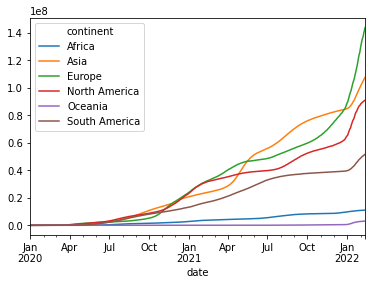

In [12]:
#Creamos un nuevo conjunto de datos que se utilizará para la previsión. Visualicemos estos datos con pandas.DataFrame.plot().
#Cabe señalar que los pandas encapsulan la biblioteca matplotlib y heredan la función plot(). Por lo tanto, para mostrar este
#gráfico, necesitamos importar la biblioteca matplotlib y aplicar la función matplotlib.pyplot.show(). 
p_covid.plot()
import matplotlib.pyplot as plt
plt.show()

In [13]:
#Eliminación de datos faltantes
#Como puede ver, el gráfico muestra los datos que faltan correctamente. Sin embargo, no todos los métodos matemáticos 
#funcionan correctamente con tales datos. Por lo tanto, es necesario eliminar todos los datos faltantes. En nuestro caso, 
#basta con eliminar las filas que lo contienen mediante la función pandas.DataFrame.dropna(). 
p_covid = p_covid.dropna()
p_covid

continent,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2020-01-01,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0
...,...,...,...,...,...,...
2022-02-07,"10,992,055","105,194,947","137,843,415","90,113,366","2,985,718","50,597,397"
2022-02-08,"11,007,188","105,828,942","139,750,853","90,369,792","3,021,229","50,877,922"
2022-02-09,"11,026,456","106,465,903","141,005,814","90,611,121","3,037,172","51,157,840"


In [14]:
#Pronóstico
#Creación de hipótesis
#Antes de realizar un pronóstico, primero debe determinar el campo de destino (salida) para el cual se creará el pronóstico. 
#El siguiente paso es crear una hipótesis que implique determinar los campos de entrada de los que depende nuestro objetivo. 
#Intentemos hacer una predicción sobre el total de casos en África. Podemos proponer dos hipótesis:

#El número de casos totales en África depende del de otros continentes.
#El número de casos totales en África no depende del de otros continentes.
#Para comprobar la primera hipótesis, deberíamos hacer un análisis de correlación usando pandas.DataFrame.corr(). 
pd.options.display.float_format = '{:,.2f}'.format
p_covid.corr()

continent,Africa,Asia,Europe,North America,Oceania,South America
continent,,,,,,
Africa,1.00,0.99,0.97,0.99,0.60,0.99
Asia,0.99,1.00,0.96,0.97,0.60,0.99
Europe,0.97,0.96,1.00,0.99,0.74,0.96
North America,0.99,0.97,0.99,1.00,0.67,0.98
Oceania,0.60,0.60,0.74,0.67,1.00,0.55
South America,0.99,0.99,0.96,0.98,0.55,1.00


In [15]:
#Cada celda contiene los coeficientes de correlación entre dos columnas. Por lo tanto, los elementos de la diagonal son iguales
#a uno. Como puede verse en la columna (o fila) de África, todos los coeficientes de correlación son superiores a 0,9. 
#Esto puede ser una confirmación de la primera hipótesis. Los coeficientes de correlación cercanos a 1 significan la presencia
#de una estrecha relación lineal entre los campos. Por tanto, para contrastar la primera hipótesis, es conveniente utilizar 
#modelos lineales.

#Dividir el DataSet en conjuntos de entrenamiento y prueba
#Para el ajuste y prueba del modelo, es necesario dividir el DataSet en un conjunto de entrenamiento y otro de prueba. 
#Puede implementar esto con las herramientas clásicas de Python, como cortes o usando una función especial con muchas 
#configuraciones flexibles (sklearn.model_selection.train_test_split()). Tomaremos el 30% de nuestro DataSet para un conjunto de
#prueba.
proportion_train_test = 0.7
l = int(proportion_train_test * len(p_covid))
col = p_covid.columns


In [16]:
X_train, X_test, y_train, y_test =p_covid[col[1:]][:l], p_covid[col[1:]][l:], p_covid[col[0]][:l], p_covid[col[0]][l:]

In [17]:
# sklearn function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(p_covid[col[1:]], p_covid[col[0]], test_size=0.3, shuffle=False)

In [18]:
#Creando modelos usando sklearn
#Para construir un modelo lineal, es necesario crear el propio modelo lineal, ajustarlo, probarlo y hacer una predicción. 
#Para hacer esto, use sklearn.linear_model.LinearRegression().
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [19]:
#Resultados de traducción
#Cálculo de indicadores estadísticos básicos
#Los resultados de la predicción para los conjuntos de prueba y entrenamiento están en las variables y_pred_test y y_pred_train. 
#Después de eso, podemos verificar la idoneidad y precisión de nuestro modelo usando sklearn.metrics. 
#También podemos obtener los parámetros del modelo lineal.
from sklearn import metrics
print("Correlation train", regressor.score(X_train, y_train))
print("Correlation test", regressor.score(X_test, y_test))
print("Coefficients:", regressor.coef_)
# pair the feature names with the coefficients
print('Pair the feature names with the coefficients:')
for s in zip(col[1:], regressor.coef_):
    print(s[0], ":", s[1])
print("Intercept", regressor.intercept_)
print('Mean Absolute Error (train):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Absolute Error (test):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error (train):', metrics.mean_squared_error(y_train, y_pred_train))
print('Mean Squared Error (test):', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Root Mean Squared Error (test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Correlation train 0.9995063046514487
Correlation test -4.899535920489529
Coefficients: [-0.0201485  -0.03379896  0.09849758  4.70000301  0.11684388]
Pair the feature names with the coefficients:
Asia : -0.02014849983012116
Europe : -0.03379896021912575
North America : 0.09849758498395345
Oceania : 4.700003009993193
South America : 0.11684388496939027
Intercept -35968.283274607966
Mean Absolute Error (train): 33628.89202645148
Mean Absolute Error (test): 2068795.2931604378
Mean Squared Error (train): 1524686597.5269217
Mean Squared Error (test): 12150943164695.305
Root Mean Squared Error (train): 39047.23546586777
Root Mean Squared Error (test): 3485820.300115212


In [20]:
#Creando modelos usando statsmodels¶
#Como puede ver, hay una gran diferencia en la precisión entre los resultados del entrenamiento y de la prueba. 
#Significa que esta hipótesis no es correcta. Además, este marco no puede generar un informe resumido. 
#Para hacer esto, podemos usar el marco statsmodels.api.
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()
y_pred_test_OLS = results.predict(X_test)
y_pred_train_OLS = results.predict(X_train)
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Africa   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.836e+05
Date:                Sat, 19 Feb 2022   Prob (F-statistic):                        0.00
Time:                        09:37:17   Log-Likelihood:                         -6541.2
No. Observations:                 541   AIC:                                  1.309e+04
Df Residuals:                     536   BIC:                                  1.311e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [21]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params, sep = '\n')

coefficient of determination: 0.9997206266705626
adjusted coefficient of determination: 0.9997180205760716
regression coefficients:
Asia            -0.02
Europe          -0.03
North America    0.10
Oceania          2.46
South America    0.12
dtype: float64


In [22]:
#Deberíamos unir los resultados para comparar estos dos modelos de marco usando pandas.DataFrame.join(): 
df_test = pd.DataFrame({'Actual_test': y_test, 'Predicted_test': y_pred_test, 'Predicted_test_OLS': y_pred_test_OLS})
df_train = pd.DataFrame({'Actual_train': y_train, 'Predicted_train': y_pred_train, 'Predicted_train_OLS': y_pred_train_OLS})
df = df_train.join(df_test, how='outer')
df

,Actual_train,Predicted_train,Predicted_train_OLS,Actual_test,Predicted_test,Predicted_test_OLS
date,,,,,,
2020-01-01,0.00,"-35,968.28",0.00,NaN,NaN,NaN
2020-01-02,0.00,"-35,968.28",0.00,NaN,NaN,NaN
2020-01-03,0.00,"-35,968.28",0.00,NaN,NaN,NaN
2020-01-04,0.00,"-35,968.28",0.00,NaN,NaN,NaN
2020-01-05,0.00,"-35,968.28",0.00,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-02-07,NaN,NaN,NaN,"10,992,055.00","22,006,376.19","15,564,637.82"
2022-02-08,NaN,NaN,NaN,"11,007,188.00","22,154,069.50","15,632,506.24"
2022-02-09,NaN,NaN,NaN,"11,026,456.00","22,230,228.50","15,673,249.15"


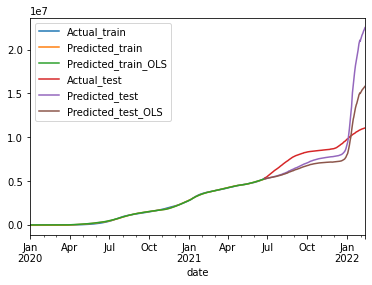

In [23]:
#Como puede ver, pandas une y ordena los datos correctamente de acuerdo con el campo de índice automáticamente. 
#Por lo tanto, es muy importante verificar el tipo de datos del campo de índice, especialmente cuando tratamos con tiempo 
#de datos.

#Visualicemos los datos.
df.plot()
plt.show()

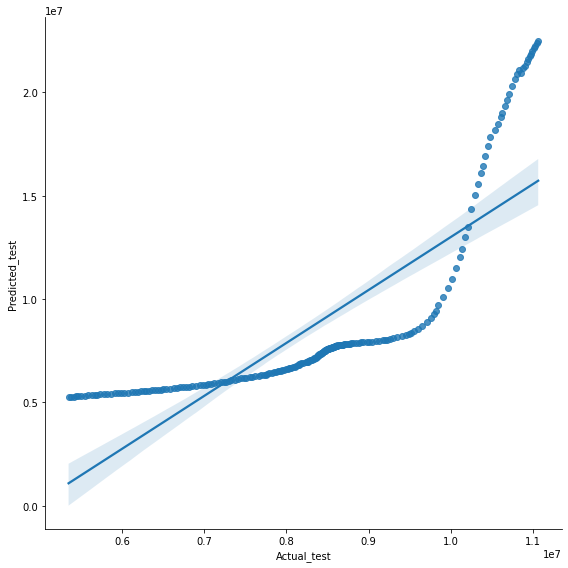

In [24]:
#Puede ver que los resultados de estos dos modelos son los mismos. También puede ver que el pronóstico de los datos de prueba 
#no es perfecto. Para ver la diferencia entre nuestro pronóstico y los datos reales, podemos usar seaborn.pairplot(). 
import seaborn as sns
sns.pairplot(df_test, x_vars=['Actual_test'], y_vars='Predicted_test',  kind='reg', height = 8)
plt.show()

In [25]:
#Los valores de datos reales se trazan en el eje horizontal y los predichos se trazan en el eje vertical. 
#Cuanto más cerca estén los puntos de resultado de la diagonal, mejor será el pronóstico del modelo. 
#Este gráfico prueba nuestra conclusión sobre la mala calidad del pronóstico bajo esta hipótesis.
#Además, para hacer un pronóstico para el futuro, debe conocer datos futuros para otros continentes.

#Pronóstico de series de tiempo
#Intentemos probar la segunda hipótesis. De acuerdo con esto, debemos considerar solo una serie de tiempo. 
#En nuestro caso - África. La única suposición que se puede hacer: los datos de hoy dependen de los valores de los días 
#anteriores. Para verificar las dependencias, es necesario analizar las correlaciones entre ellas. Esto requiere:

#Duplicar la serie temporal de datos y moverla verticalmente hacia abajo durante un cierto número de días (retraso)
#Eliminando los datos que faltan al principio y al final (están formados por desplazamiento vertical 
#([pandas.DataFrame.shift()])(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas. trama de datos.shift.html)
#Cálculo del coeficiente de correlación entre las series obtenidas.
#Dado que esta operación debe realizarse para diferentes valores de retraso, es conveniente crear una función separada: 
def lag_correlation_ts(y, x, lag):
    """
    Lag correlation for 2 DateSeries
    :param y: fixed
    :param x: shifted
    :param lag: lag for shifting
    :return: DataFrame of lags correlation coefficients
    """
    r = [0] * (lag + 1)
    y = y.copy()
    x = x.copy()
    y.name = "y"
    x.name = "x"

    for i in range(0, lag + 1):
        ds = y.copy().to_frame()
        ds = ds.join(x.shift(i), how='outer')
        r[i] = ds.corr().values[0][1]
    r = pd.DataFrame(r)
    r.index.names = ['Lag']
    r.columns = ['Correlation']
    return r

In [26]:
y_dataset = p_covid[col[0]]
y_dataset

date
2020-01-01            0.00
2020-01-02            0.00
2020-01-03            0.00
2020-01-04            0.00
2020-01-05            0.00
                  ...     
2022-02-07   10,992,055.00
2022-02-08   11,007,188.00
2022-02-09   11,026,456.00
2022-02-10   11,045,441.00
2022-02-11   11,061,535.00
Name: Africa, Length: 773, dtype: float64

In [27]:
#Probemos un retraso de 30 días. 
pd.options.display.float_format = '{:,.4f}'.format
l = pd.DataFrame(lag_correlation_ts(y_dataset, y_dataset, 30))
l

,Correlation
Lag,
0,1.0000
1,1.0000
2,1.0000
3,1.0000
4,0.9999
5,0.9999
6,0.9999
7,0.9998
8,0.9997


In [28]:
#Como puede ver, los datos de la serie temporal dependen en gran medida de los datos del período anterior. 
#Incluso con un retraso de 30 días, existe una estrecha relación lineal.

#Para construir un modelo lineal del tipo entrada-objetivo, el objetivo deben ser los datos de la serie temporal original y 
#la entrada deben ser los valores de los días anteriores.

#Para automatizar este proceso, vamos a crear una función de transformación de serie temporal universal en una estructura 
#DataSet.
def series_to_supervised(in_data, tar_data, n_in=1, dropnan=True, target_dep=False):
    """
    Transformation into a training sample, taking into account the lag
     : param in_data: Input fields
     : param tar_data: Output field (single)
     : param n_in: Lag shift
     : param dropnan: Do destroy empty lines
     : param target_dep: Whether to take into account the lag of the input field. If taken into account, the input will start with lag 1
     : return: Training sample. The last field is the source
    """

    n_vars = in_data.shape[1]
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    # for i in range(n_in, -1, -1):
    if target_dep:
        i_start = 1
    else:
        i_start = 0
    for i in range(i_start, n_in + 1):
        cols.append(in_data.shift(i))
        names += [('%s(t-%d)' % (in_data.columns[j], i)) for j in range(n_vars)]

    if target_dep:
        for i in range(n_in, -1, -1):
            cols.append(tar_data.shift(i))
            names += [('%s(t-%d)' % (tar_data.name, i))]
    else:
        # put it all together
        cols.append(tar_data)
        # print(tar_data.name)
        names.append(tar_data.name)
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

In [29]:
dataset = series_to_supervised(pd.DataFrame(y_dataset), y_dataset, 30)
dataset

,Africa(t-0),Africa(t-1),Africa(t-2),Africa(t-3),Africa(t-4),Africa(t-5),Africa(t-6),Africa(t-7),Africa(t-8),Africa(t-9),...,Africa(t-22),Africa(t-23),Africa(t-24),Africa(t-25),Africa(t-26),Africa(t-27),Africa(t-28),Africa(t-29),Africa(t-30),Africa
date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-02,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-03,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-04,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-07,"10,992,055.0000","10,978,480.0000","10,963,617.0000","10,943,059.0000","10,927,321.0000","10,896,112.0000","10,877,658.0000","10,852,013.0000","10,823,608.0000","10,808,262.0000",...,"10,389,053.0000","10,371,635.0000","10,334,659.0000","10,294,367.0000","10,247,765.0000","10,207,882.0000","10,169,415.0000","10,137,782.0000","10,109,085.0000","10,992,055.0000"
2022-02-08,"11,007,188.0000","10,992,055.0000","10,978,480.0000","10,963,617.0000","10,943,059.0000","10,927,321.0000","10,896,112.0000","10,877,658.0000","10,852,013.0000","10,823,608.0000",...,"10,419,253.0000","10,389,053.0000","10,371,635.0000","10,334,659.0000","10,294,367.0000","10,247,765.0000","10,207,882.0000","10,169,415.0000","10,137,782.0000","11,007,188.0000"
2022-02-09,"11,026,456.0000","11,007,188.0000","10,992,055.0000","10,978,480.0000","10,963,617.0000","10,943,059.0000","10,927,321.0000","10,896,112.0000","10,877,658.0000","10,852,013.0000",...,"10,446,204.0000","10,419,253.0000","10,389,053.0000","10,371,635.0000","10,334,659.0000","10,294,367.0000","10,247,765.0000","10,207,882.0000","10,169,415.0000","11,026,456.0000"


In [30]:
#Como puede ver, la primera y la última columna contienen los mismos datos objetivo. Por lo tanto, de manera similar al modelo
#anterior, formaremos conjuntos de datos de entrenamiento y prueba, ajustaremos y compararemos los resultados. 
col_2 = dataset.columns
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(dataset[col_2[1:-2]], dataset[col_2[-1]], test_size=0.3, shuffle=False)
regressor2 = LinearRegression()
regressor2.fit(X_train_2, y_train_2)
y_pred_test_2 = regressor2.predict(X_test_2)

In [31]:
print("Correlation train", regressor2.score(X_train_2, y_train_2))
print("Correlation test", regressor2.score(X_test_2, y_test_2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, y_pred_test_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, y_pred_test_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_test_2)))

Correlation train 0.9999992222200276
Correlation test 0.9999787613824603
Mean Absolute Error: 4381.795141118174
Mean Squared Error: 38177369.56259009
Root Mean Squared Error: 6178.783825526678


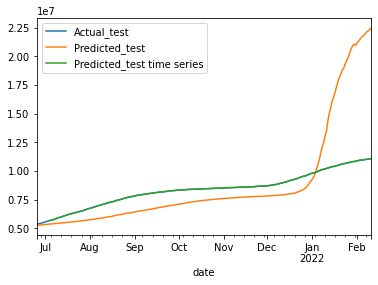

In [32]:
#Como puede ver, los resultados de pronóstico del conjunto de datos de prueba son mucho mejores que los del modelo anterior.
#Visualicemos estos 2 resultados:
y_pred_test_2 = pd.DataFrame(y_pred_test_2, columns = ['Predicted_test time series'])
y_pred_test_2.index = y_test_2.index
df_2 = pd.DataFrame({'Actual_test': y_test, 'Predicted_test': y_pred_test, })
df_2 = df_2.join(y_pred_test_2, how='outer')
df_2.plot()
plt.show()

In [34]:
#Como puede ver, el segundo modelo ha hecho un pronóstico perfecto. 


In [35]:
#Mapas interactivos
#Transformación de datos para mapeo
#Es conveniente mostrar la propagación de la infección viral en un mapa para visualizarla. Hay varias bibliotecas para esto. 
#Es conveniente utilizar la biblioteca plotly.express para visualizar la dinámica del COVID-19. 


In [36]:
import plotly.express as px

In [ ]:
#Construyamos la dinámica de propagación de COVID-19 (total_cases) para los países europeos. Para hacer esto:

#Filtre el DataSet inicial para dejar solo los países europeos.
#Deje solo las columnas con los datos GEO necesarios ("ubicación", "fecha", "total_casos") ordenadas por "ubicación" y "fecha". 

In [37]:
covid_EU = covid_word[covid_word.continent == "Europe"]
covid_EU = covid_EU[["location", "date", "total_cases"]].sort_values(["location", "date"])
covid_EU

,location,date,total_cases
1449,Albania,2020-02-25,NaN
1450,Albania,2020-02-26,NaN
1451,Albania,2020-02-27,NaN
1452,Albania,2020-02-28,NaN
1453,Albania,2020-02-29,NaN
...,...,...,...
156410,Vatican,2022-02-07,29.0000
156411,Vatican,2022-02-08,29.0000
156412,Vatican,2022-02-09,29.0000
156413,Vatican,2022-02-10,29.0000


In [38]:
#Antes de la visualización, debemos eliminar los datos de NaN: 

In [39]:
modified_confirmed_EU = covid_EU[np.isnan(covid_EU.total_cases) == False]
modified_confirmed_EU

,location,date,total_cases
1462,Albania,2020-03-09,2.0000
1463,Albania,2020-03-10,10.0000
1464,Albania,2020-03-11,12.0000
1465,Albania,2020-03-12,23.0000
1466,Albania,2020-03-13,33.0000
...,...,...,...
156410,Vatican,2022-02-07,29.0000
156411,Vatican,2022-02-08,29.0000
156412,Vatican,2022-02-09,29.0000
156413,Vatican,2022-02-10,29.0000


In [40]:
#Deberíamos cambiar el tipo de columna total_cases a int64 para mostrar los colores del mapa correctamente. 


In [41]:
c = 'total_cases'
modified_confirmed_EU.loc[:, c] = modified_confirmed_EU[c].astype('int64')
modified_confirmed_EU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35135 entries, 1462 to 156414
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   location     35135 non-null  category      
 1   date         35135 non-null  datetime64[ns]
 2   total_cases  35135 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 902.1 KB


C:\Users\MICKE\AppData\Local\Temp\ipykernel_3424\2087965504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_confirmed_EU.loc[:, c] = modified_confirmed_EU[c].astype('int64')


In [42]:
#Agrupemos los datos por país. Para cada país, las filas deben ordenarse por la fecha de medición. 
modified_confirmed_EU=modified_confirmed_EU.set_index('date').groupby('location')

In [43]:
#Como podemos ver, el DataSet consta de 20052 filas. Es demasiado para el mapeo GEO. Tenemos que reducir su número. 
#Por ejemplo, podemos mostrar no por días, sino por meses. Para hacer esto, necesita usar la función 
#pandas.DataFrame.resample(). 
modified_confirmed_EU = modified_confirmed_EU.resample('M').sum()
print(modified_confirmed_EU)

                    location  total_cases
location date                            
Albania  2020-03-31      NaN         2232
         2020-04-30      NaN        15632
         2020-05-31      NaN        28873
         2020-06-30      NaN        50880
         2020-07-31      NaN       119660
...                      ...          ...
Vatican  2021-10-31      NaN          837
         2021-11-30      NaN          810
         2021-12-31      NaN          837
         2022-01-31      NaN          865
         2022-02-28      NaN          319

[1208 rows x 2 columns]


In [44]:
#Para mostrar todo en el mapa correctamente, necesitamos restaurar los datos en el campo "ubicación" y duplicar el campo
#"Datos" convirtiéndolo al tipo de datos str. Esto es necesario para mostrar correctamente las fechas del mapa interactivo en la
#barra de desplazamiento.
modified_confirmed_EU.loc[:,'location'] = modified_confirmed_EU.index.get_level_values(0)
modified_confirmed_EU.loc[:,'Date'] = modified_confirmed_EU.index.get_level_values(1).astype('str')

print(modified_confirmed_EU)

                    location  total_cases        Date
location date                                        
Albania  2020-03-31  Albania         2232  2020-03-31
         2020-04-30  Albania        15632  2020-04-30
         2020-05-31  Albania        28873  2020-05-31
         2020-06-30  Albania        50880  2020-06-30
         2020-07-31  Albania       119660  2020-07-31
...                      ...          ...         ...
Vatican  2021-10-31  Vatican          837  2021-10-31
         2021-11-30  Vatican          810  2021-11-30
         2021-12-31  Vatican          837  2021-12-31
         2022-01-31  Vatican          865  2022-01-31
         2022-02-28  Vatican          319  2022-02-28

[1208 rows x 3 columns]


In [45]:
#Descargar polígonos de mapas
#El siguiente paso es descargar los polígonos del mapa. Están disponibles públicamente: 
#https://data.opendatasoft.com/explore/dataset/european-union-countries%40public/information/. 
#También se presenta un esquema DataSet en este sitio. Puede ver que la clave "NOMBRE" de este json está conectada al campo
#"ubicación" en nuestro DataSet.
import json
!wget european-union-countries.geojson "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-basic-prognostication-and-geo-visualization/european-union-countries.geojson"
with open("european-union-countries.geojson", encoding="utf8") as json_file:
    EU_map = json.load(json_file)

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


FileNotFoundError: [Errno 2] No such file or directory: 'european-union-countries.geojson'